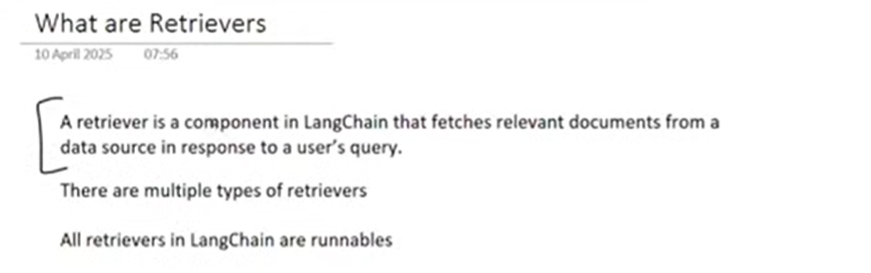

- retriver is a funcion that takes user querry as input and gives relevant document (output-> multiple document  objects deta hy)
- Types of Reterivers
    1. Data source based (wekiedia ka alag,vector store ka alag, research ppr ka alg)
    2. search strategy jinki same hoti (MMR,multi query, ....)

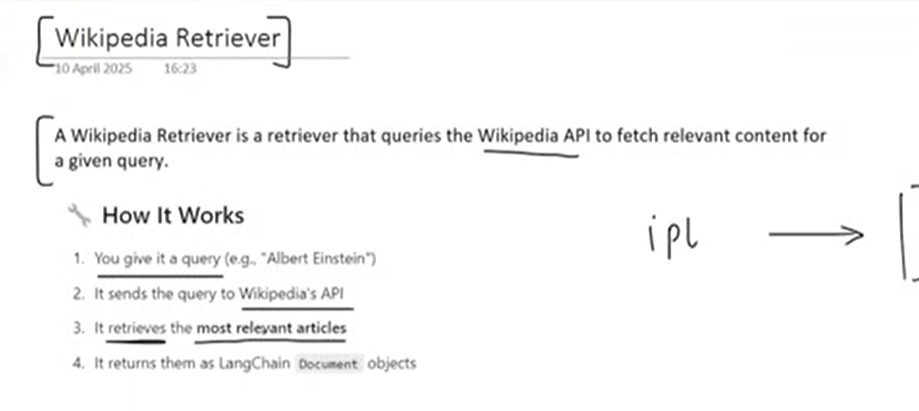

In [4]:
from langchain_community.retrievers import WikipediaRetriever

In [5]:
retriver = WikipediaRetriever(top_k_results=3,lang ="en") # arguemnts optional hain 

In [6]:
query =  "the geopolitical location of pakistan and INdia from prospective of Chinese"

In [7]:
docs = retriver.invoke(query)
docs

[Document(metadata={'title': 'Pakistan', 'summary': "Pakistan, officially the Islamic Republic of Pakistan, is a country in South Asia. It is the fifth-most populous country, with a population of over 241.5 million, having the second-largest Muslim population as of 2023. Islamabad is the nation's capital, while Karachi is its largest city and financial centre. Pakistan is the 33rd-largest country by area. Bounded by the Arabian Sea on the south, the Gulf of Oman on the southwest, and the Sir Creek on the southeast, it shares land borders with India to the east; Afghanistan to the west; Iran to the southwest; and China to the northeast. It shares a maritime border with Oman in the Gulf of Oman, and is separated from Tajikistan in the northwest by Afghanistan's narrow Wakhan Corridor.\nPakistan is the site of several ancient cultures, including the 8,500-year-old Neolithic site of Mehrgarh in Balochistan, the Indus Valley Civilisation of the Bronze Age, and the ancient Gandhara civilisat

In [8]:
for ind,ans in enumerate(docs):
    print(f"\n\n\n---------Result: {ind+1}----------")
    print(ans.page_content)




---------Result: 1----------
Pakistan, officially the Islamic Republic of Pakistan, is a country in South Asia. It is the fifth-most populous country, with a population of over 241.5 million, having the second-largest Muslim population as of 2023. Islamabad is the nation's capital, while Karachi is its largest city and financial centre. Pakistan is the 33rd-largest country by area. Bounded by the Arabian Sea on the south, the Gulf of Oman on the southwest, and the Sir Creek on the southeast, it shares land borders with India to the east; Afghanistan to the west; Iran to the southwest; and China to the northeast. It shares a maritime border with Oman in the Gulf of Oman, and is separated from Tajikistan in the northwest by Afghanistan's narrow Wakhan Corridor.
Pakistan is the site of several ancient cultures, including the 8,500-year-old Neolithic site of Mehrgarh in Balochistan, the Indus Valley Civilisation of the Bronze Age, and the ancient Gandhara civilisation. The regions that 

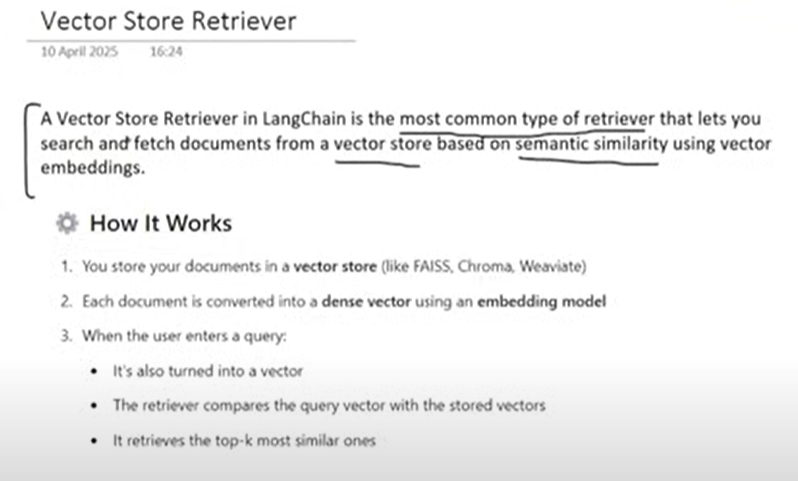

In [9]:
from langchain.embeddings import HuggingFaceEmbeddings
from langchain.vectorstores import Chroma
from langchain.schema import Document
embeddings = HuggingFaceEmbeddings(model_name="sentence-transformers/all-MiniLM-L6-v2")
docs =[ Document(
    page_content="Artificial Intelligence (AI) is a branch of computer science that aims to create machines capable of mimicking human intelligence, including tasks like learning, reasoning, and problem-solving.",
    metadata={"category": "AI"}
),Document(
    page_content="Machine Learning (ML) is a subset of AI that focuses on building algorithms that enable computers to learn from and make predictions or decisions based on data.",
    metadata={"category": "ML"}
), Document(
    page_content="LangChain is an open-source framework for building applications powered by language models. It simplifies chaining LLMs, prompts, memory, and tools into complex workflows.",
    metadata={"category": "LangChain"}
),Document(
    page_content="Large Language Models (LLMs) like GPT-4 are deep learning models trained on massive datasets. They are capable of understanding and generating human-like text for a wide range of tasks.",
    metadata={"category": "LLM"}
),Document(
    page_content="Vector databases like Pinecone, Weaviate, and FAISS are essential for storing and retrieving high-dimensional embeddings used in AI applications such as semantic search and recommendation systems.",
    metadata={"category": "Vector Database"}
)]

vector_store =  Chroma.from_documents(
    documents=docs,
    embedding=embeddings,  # konsa us kr rhy  -->OpenAIEmbeddings()
    collection_name="sample"
) 


In [10]:
# convert vectorstroe into reteriver  
retriver = vector_store.as_retriever(search_kwargs = {"k":2})

In [11]:
query = "what is used for  predictions"
result = retriver.invoke(query)

In [12]:
result

[Document(metadata={'category': 'ML'}, page_content='Machine Learning (ML) is a subset of AI that focuses on building algorithms that enable computers to learn from and make predictions or decisions based on data.'),
 Document(metadata={'category': 'ML'}, page_content='Machine Learning (ML) is a subset of AI that focuses on building algorithms that enable computers to learn from and make predictions or decisions based on data.')]

### Same chez hum vector_store.similarity se kr rhy thy so ab retriver Q use kr rhy hain. Basically retriver have many searching ways to do this and vectorstrore just have limited .. 

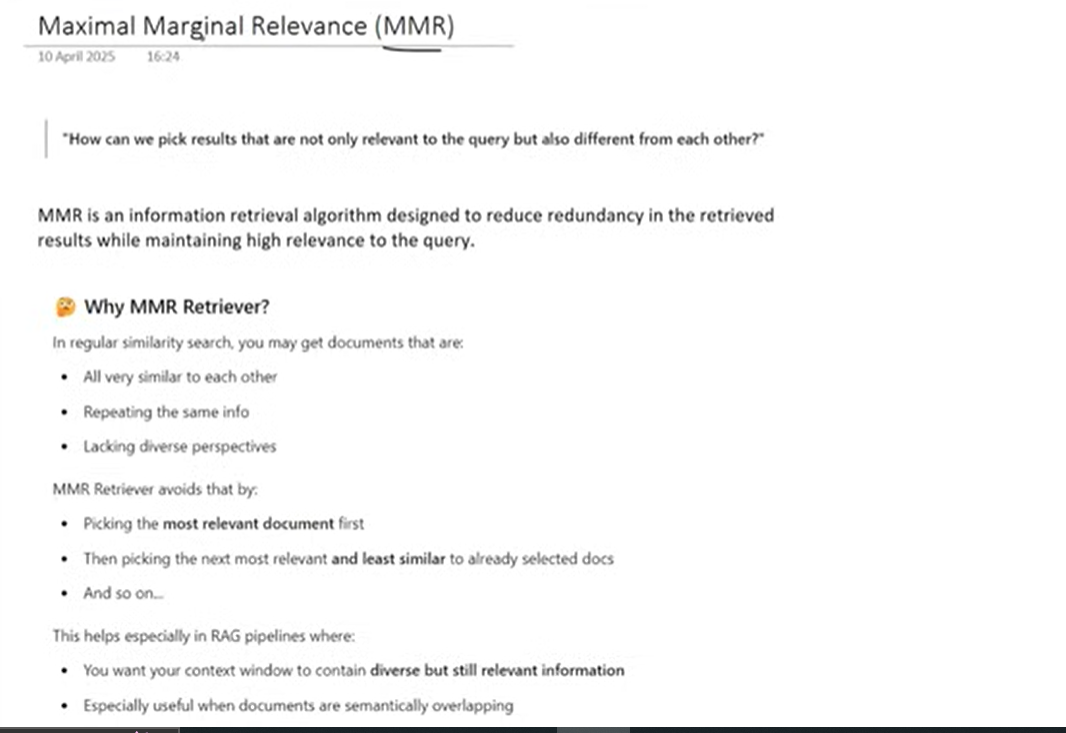
- relevant ho to the searc h qurry or diff from each other

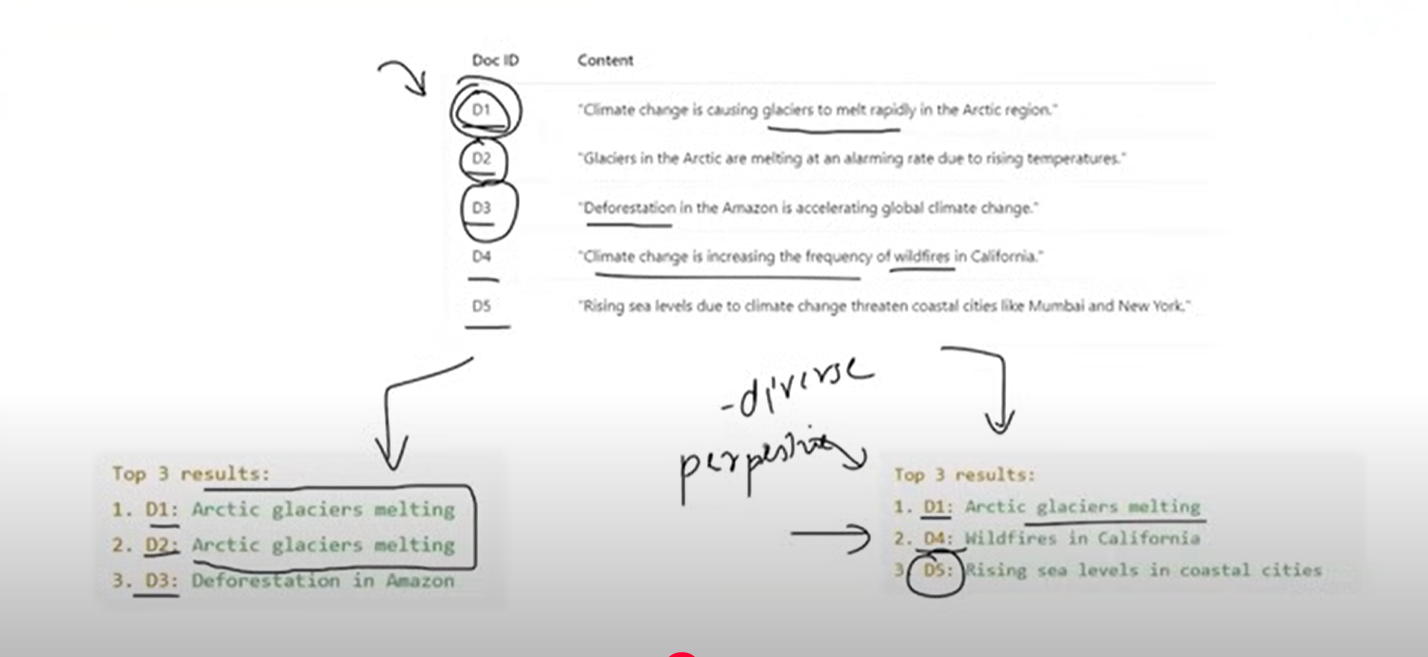

- left side wla normal search hy jisme 1,2 both gives almost same result 
- but tight side gives diverse different results

In [13]:
from langchain.embeddings import HuggingFaceEmbeddings
from langchain.vectorstores import FAISS
embeddings = HuggingFaceEmbeddings(model_name="sentence-transformers/all-MiniLM-L6-v2")


In [14]:
vector_store = FAISS.from_documents(
    embedding=embeddings,
    documents=docs,)
retriver = vector_store.as_retriever(
    search_type = "mmr", # MMR hogi search type
    search_kwargs = {"k" : 3 ,"lambda_mult" : 1} # k means top result lambda_mult =relevance diversity balance  (1 means jese similarit work krta 0 mans bhhoooot diverse tw iske beech me rkho)
)

In [15]:
retriver.invoke("db")

[Document(id='8c793435-0ace-41a7-8d2c-261554a59109', metadata={'category': 'Vector Database'}, page_content='Vector databases like Pinecone, Weaviate, and FAISS are essential for storing and retrieving high-dimensional embeddings used in AI applications such as semantic search and recommendation systems.'),
 Document(id='07517ea8-53cb-43d3-95b3-68b6471b5faa', metadata={'category': 'LangChain'}, page_content='LangChain is an open-source framework for building applications powered by language models. It simplifies chaining LLMs, prompts, memory, and tools into complex workflows.'),
 Document(id='4f5fd280-8f8c-4c10-8af5-f2de365dde35', metadata={'category': 'LLM'}, page_content='Large Language Models (LLMs) like GPT-4 are deep learning models trained on massive datasets. They are capable of understanding and generating human-like text for a wide range of tasks.')]

# Multi-Querry Reteriversm
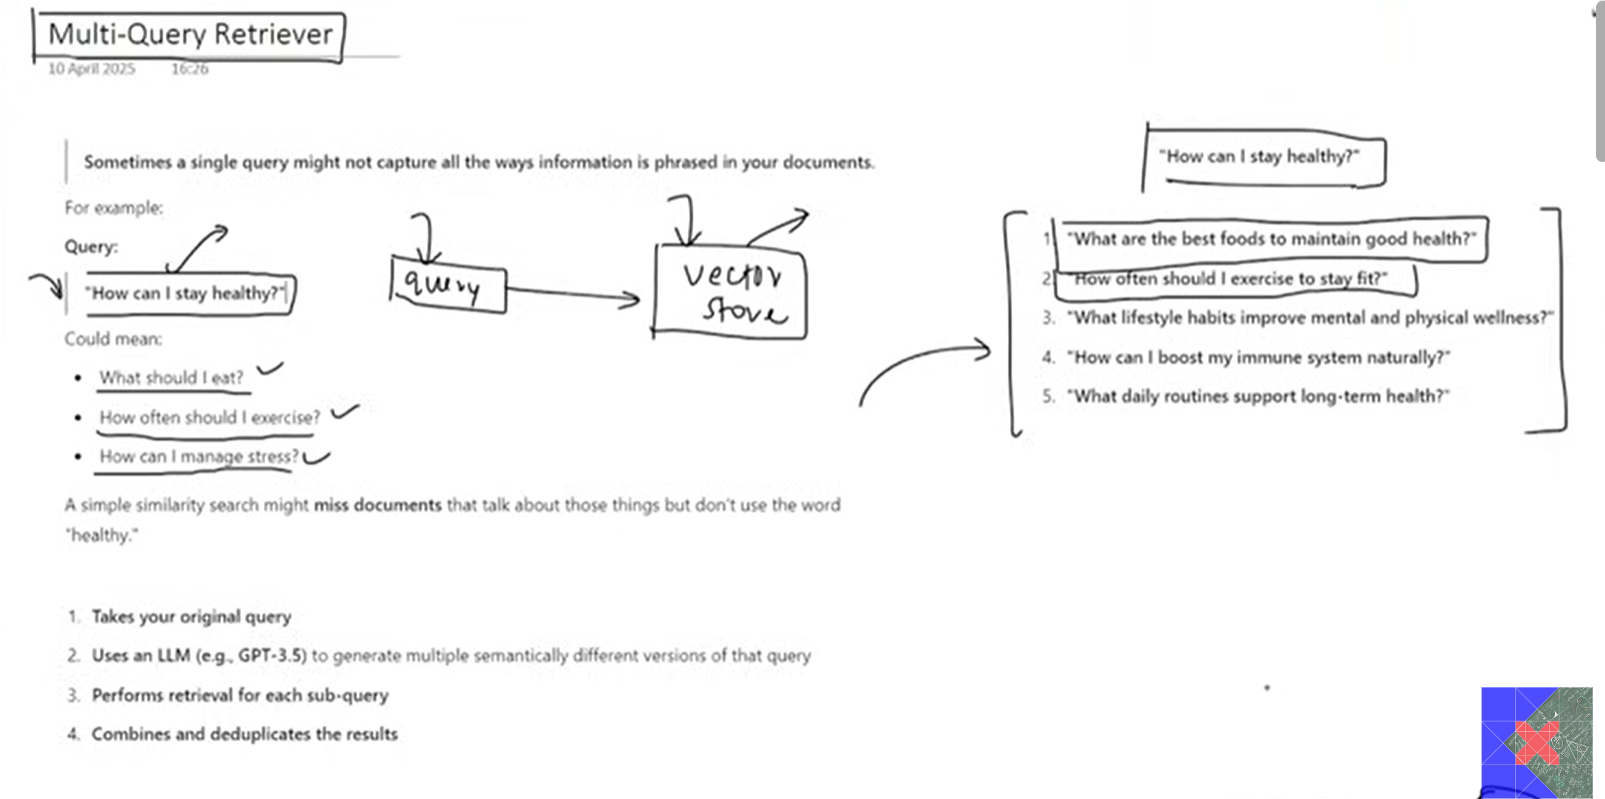


-   user ke un clear quwtion ko llm ko deta llm khud se 5 querry nikal kr relevant document me search krta hy and 5 asnwers a kr combine ho kr user ko dikha jate

In [23]:
from langchain.schema import Document

# Relevant health & wellness documents
docs = [
    Document(page_content="Regular walking boosts heart health and can reduce symptoms of depression.", metadata={"source": "H1"}),
    Document(page_content="Consuming leafy greens and fruits helps detox the body and improve longevity.", metadata={"source": "H2"}),
    Document(page_content="Deep sleep is crucial for cellular repair and emotional regulation.", metadata={"source": "H3"}),
    Document(page_content="Mindfulness and controlled breathing lower cortisol and improve mental clarity.", metadata={"source": "H4"}),
    Document(page_content="Drinking sufficient water throughout the day helps maintain metabolism and energy.", metadata={"source": "H5"}),
    Document(page_content="The solar energy system in modern homes helps balance electricity demand.", metadata={"source": "I1"}),
    Document(page_content="Python balances readability with power, making it a popular system design language.", metadata={"source": "I2"}),
    Document(page_content="Photosynthesis enables plants to produce energy by converting sunlight.", metadata={"source": "I3"}),
    Document(page_content="The 2022 FIFA World Cup was held in Qatar and drew global energy and excitement.", metadata={"source": "I4"}),
    Document(page_content="Black holes bend spacetime and store immense gravitational energy.", metadata={"source": "I5"}),
]



In [18]:
from langchain_openai import ChatOpenAI

GROQ_API_KEY = "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"

model = ChatOpenAI(
    api_key = GROQ_API_KEY,
    base_url="https://api.groq.com/openai/v1",  # Groq OpenAI-compatible endpoint
    model="llama3-8b-8192"
)

In [36]:
from langchain.embeddings import HuggingFaceEmbeddings
from langchain.vectorstores import FAISS
from langchain.retrievers import MultiQueryRetriever
embeddings = HuggingFaceEmbeddings(model_name="sentence-transformers/all-MiniLM-L6-v2")
vector_store = FAISS.from_documents(
    embedding=embeddings,
    documents=docs,)
similarity_retriver = vector_store.as_retriever(
    search_type = "similarity",
    search_kwargs = {"k" : 5 } 
)
# multi qurry hamari querry le kr uski alag querries generate krta hy by using llm
multi_querry_retriver = MultiQueryRetriever.from_llm(
    retriever=vector_store.as_retriever(search_kwargs = {"k" : 3 }),
    llm = model
)

In [25]:
querry =  "how to improve energy level and maintain balance"

In [37]:
# result 
similarity_result = similarity_retriver.invoke(query)
multi_qurry_result = multi_querry_retriver.invoke(query)


In [38]:
similarity_result

[Document(id='77fe80bb-a45d-433d-988d-a4b63b5f44b2', metadata={'source': 'I2'}, page_content='Python balances readability with power, making it a popular system design language.'),
 Document(id='c1c69e30-9610-4ea8-be85-2ecc62fdcdbe', metadata={'source': 'I5'}, page_content='Black holes bend spacetime and store immense gravitational energy.'),
 Document(id='e5613f67-ae6c-49f9-a1c8-46ea19ec2c21', metadata={'source': 'I4'}, page_content='The 2022 FIFA World Cup was held in Qatar and drew global energy and excitement.'),
 Document(id='8aa2e5be-2532-4ec0-85ca-5e7e6d32b4f5', metadata={'source': 'I1'}, page_content='The solar energy system in modern homes helps balance electricity demand.'),
 Document(id='a858b321-4a0e-4cea-9cc2-403de02634d5', metadata={'source': 'H3'}, page_content='Deep sleep is crucial for cellular repair and emotional regulation.')]

In [39]:
multi_qurry_result

[Document(id='c1c69e30-9610-4ea8-be85-2ecc62fdcdbe', metadata={'source': 'I5'}, page_content='Black holes bend spacetime and store immense gravitational energy.'),
 Document(id='77fe80bb-a45d-433d-988d-a4b63b5f44b2', metadata={'source': 'I2'}, page_content='Python balances readability with power, making it a popular system design language.'),
 Document(id='0b2f91dd-9f1d-4ed8-9b02-5faabddd6b95', metadata={'source': 'H2'}, page_content='Consuming leafy greens and fruits helps detox the body and improve longevity.'),
 Document(id='b4b6d9be-4db0-40b2-a1e0-ec6a920347e6', metadata={'source': 'H4'}, page_content='Mindfulness and controlled breathing lower cortisol and improve mental clarity.'),
 Document(id='28a4f4e7-dc23-4ac0-8e69-e8b989475ead', metadata={'source': 'I3'}, page_content='Photosynthesis enables plants to produce energy by converting sunlight.'),
 Document(id='e5613f67-ae6c-49f9-a1c8-46ea19ec2c21', metadata={'source': 'I4'}, page_content='The 2022 FIFA World Cup was held in Qata

In [41]:
# conclusion similarity wla diverse result de skhta hy like kch health k bare me kch soalrsystem ya techinical ka ,
# mmulti_querry_retriver hamesha 1 way me he answerr deta hy (hamara nhi dia bcz we are using not using OpenAI)

# Contextual Compression Retrival 
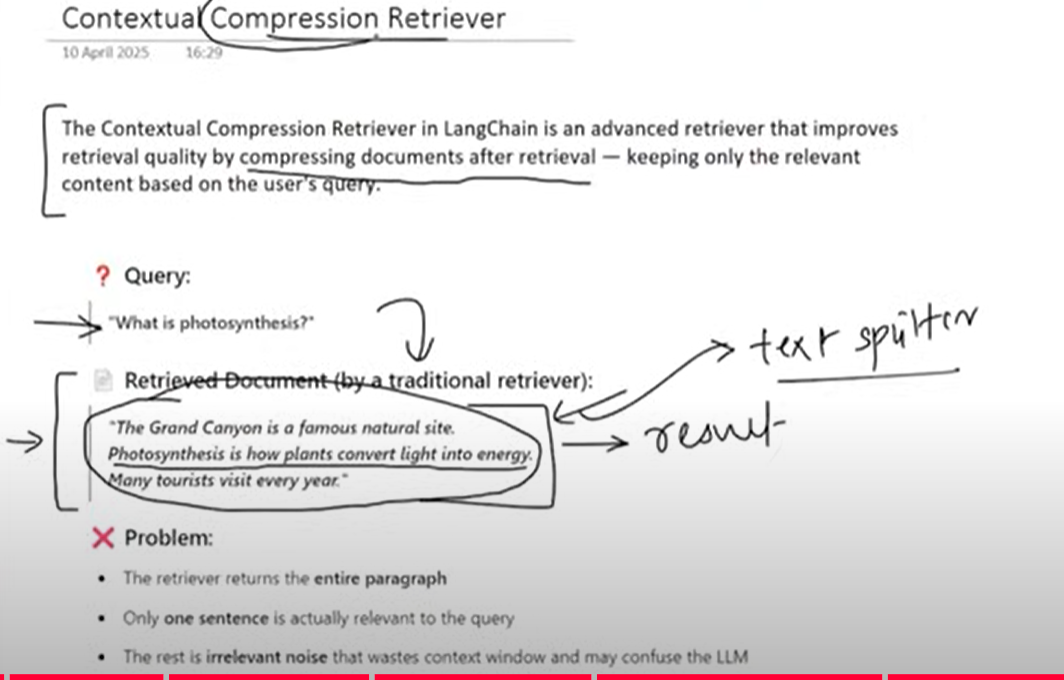 

-  paragraph uthata hy relevant and then us pr again llm lgta hy jo usko bhi more specific bna deta and we have again new result

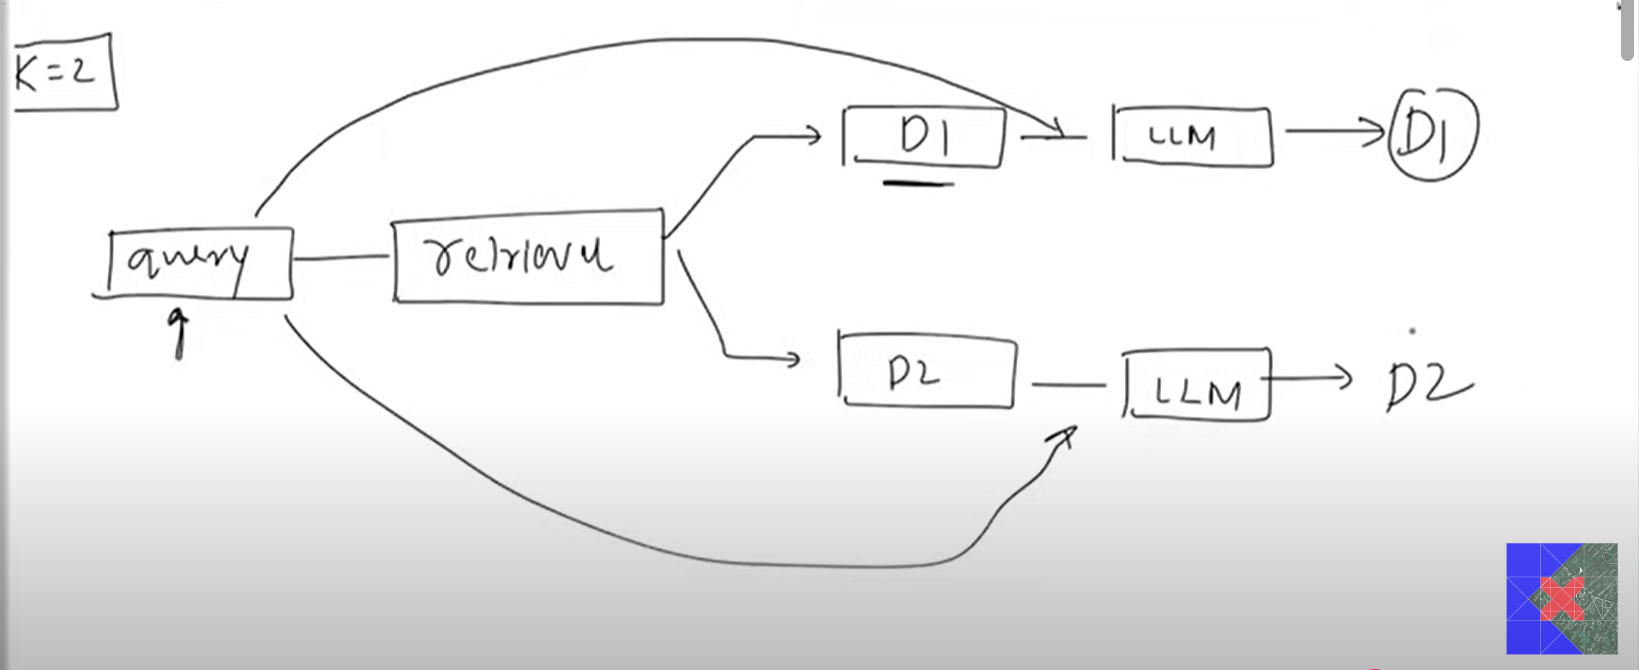

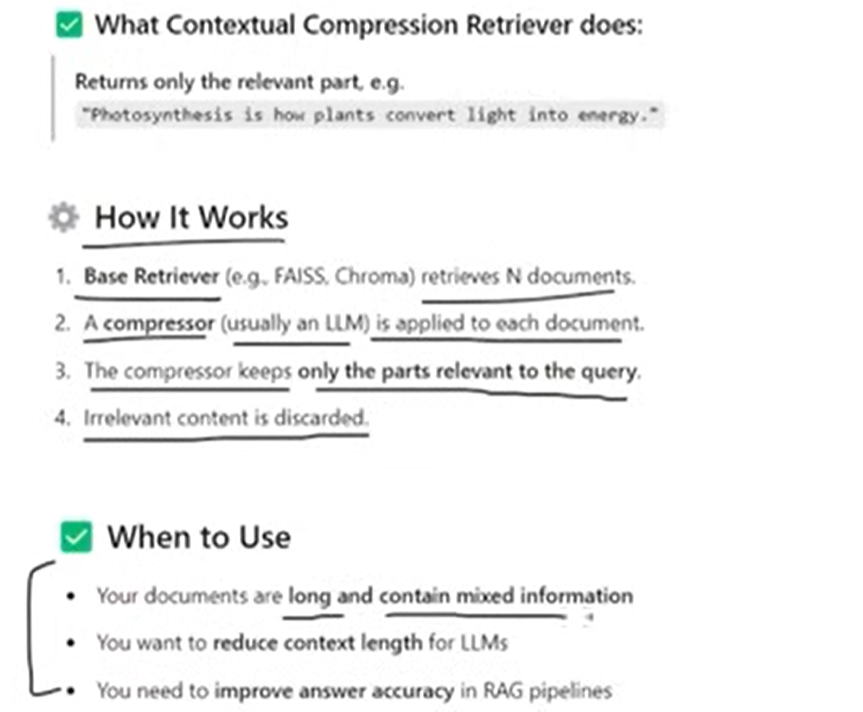

In [44]:
from langchain_openai import ChatOpenAI
GROQ_API_KEY = "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"
from langchain.embeddings import HuggingFaceEmbeddings
from langchain.vectorstores import FAISS
from langchain.retrievers.contextual_compression import ContextualCompressionRetriever
from langchain.retrievers.document_compressors import LLMChainExtractor
llm = ChatOpenAI(
    api_key = GROQ_API_KEY,
    base_url="https://api.groq.com/openai/v1",  # Groq OpenAI-compatible endpoint
    model="llama3-8b-8192"
)
embeddings = HuggingFaceEmbeddings(model_name="sentence-transformers/all-MiniLM-L6-v2")
docs = [
    Document(page_content="python is high level programming language.Blue city known as Istanbul.Regular walking boosts heart health and can reduce symptoms of depression.", metadata={"source": "H1"}),
    Document(page_content="Kind of cover drive in cricket is Babar Azam,Consuming leafy greens and fruits helps detox the body and improve longevity.", metadata={"source": "H2"}),
]
vector_store = FAISS.from_documents(
    embedding=embeddings,
    documents=docs,)
base_retriver = vector_store.as_retriever(search_kwargs={"k":1})

In [43]:
comprassor = LLMChainExtractor.from_llm(llm)  # model pass krdia means 

In [46]:
comrpession_retriver = ContextualCompressionRetriever(
    base_retriever=base_retriver,
    base_compressor=comprassor
)

In [ ]:
comrpession_retriver.invoke("blue city")    # see it fetching whole document first and then fetch relevant data only

[Document(metadata={'source': 'H1'}, page_content='Extracted relevant parts:\n\n> blue city known as Istanbul.')]

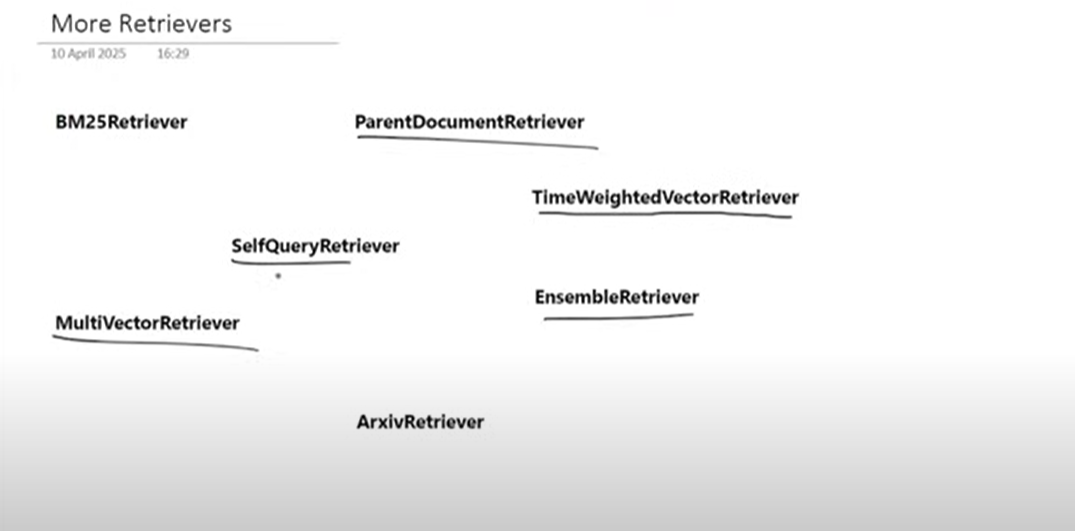